#CSE 101: Computer Science Principles
####Stony Brook University
####Kevin McDonnell (ktm@cs.stonybrook.edu)
##Module 12: Searching and Sorting Algorithms



### Overview of Searching

Searching is a common operation in many different situations:
* finding information on the web
* looking for an item at home or at work
* finding a paper in a file drawer
* looking for a friend's name in a list of contacts

In this module, we explore two well-known algorithms for searching through lists.

### Sequential Search

The basic idea of [**sequential search**](https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSequentialSearch.html) is to start at the beginning of a list and compare items one after another as we look for the **target element**.

If the item is in the list, the algorithm reports the location where it was found (i.e., the index).

If the item is not in the list, the algorithm reports a special value reserved to report failure (we will use `None` for this purpose).



In [0]:
def sequential_search(alist, target):
    i = 0
    index = None

    while i < len(alist) and index is None:
        if alist[i] == target:
            index = i
        else:
            i += 1

    return index

print(sequential_search([8, 6, 7, 5, 3, 0, 9], 3))
print(sequential_search([8, 6, 7, 5, 3, 0, 9], 1))

4
None


Sequential search is not a very efficient algorithm. As the length of the list grows, the number of comparisons grows at a linear rate.

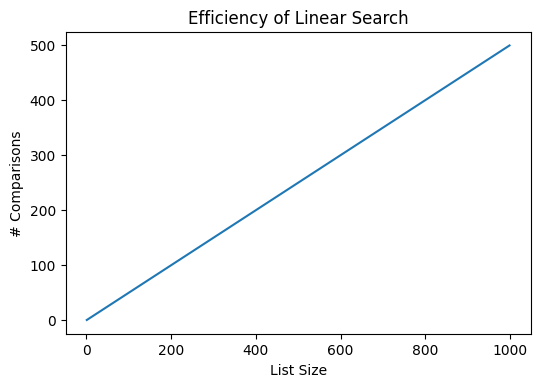

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.dpi = 100
ax.set_xlabel('List Size')
ax.set_ylabel('# Comparisons')
ax.set_title('Efficiency of Linear Search')
n = np.arange(1, 1000)
p = plt.plot(n, n/2)

### Binary Search

Given a *sorted* list of values, the [**binary search**](https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheBinarySearch.html) algorithm zeroes-in on the target element by repeatedly cutting the list in half.

To search a list of $n$ items indexed 1 to $n$, we first look at index $\frac{n}{2}$. If this is the target element, then the search has ended successfully. Otherwise, we search either the region indexed from 1 to $\frac{n}{2}-1$ or the region indexed from $\frac{n}{2}+1$ to $n$, depending on whether the target element is less than or greater than the middle element, respectively.

For each iteration, the region is cut in half, yielding ever-smaller regions to search through next.

For example, below is what it looks like if we search for 46 in a sorted list of 15 numbers:


In [0]:
from IPython.display import display, HTML
display(HTML('''<img src="https://www.cs.stonybrook.edu/~ktm/courses/cse101/colab_images/binary_search.png" width="700">'''))

We maintain two indices, `first` and `last`, which indicate where the search region begins and ends. `first` moves towards the right, and `last` towards the left. If these "pointers" cross, it means we have an unsuccesssful search.

In [0]:
def binary_search(alist, target):
    first = 0  # first = left-hand bounary of search region
    last = len(alist) - 1  # last = right-hand bounary of search region
    index = None
	
    while first <= last and index is None:
        midpoint = (first + last) // 2  # find the middle element
        if alist[midpoint] == target:     # successful search
            index = midpoint
        else:                           # continue the search
            if target < alist[midpoint]:  # search first half of region
                last = midpoint-1
            else:                       # search second half of region
                first = midpoint+1

    return index

print(binary_search([2, 10, 17, 21, 29, 46, 50, 67, 69, 70, 79, 83, 86, 91, 94], 46))
print(binary_search([2, 10, 17, 21, 29, 46, 50, 67, 69, 70, 79, 83, 86, 91, 94], 8))

5
None


Binary search is much more efficient than sequential search. As the length of the list grows, the number of comparisons grows at a very slow rate (logarithmic growth).

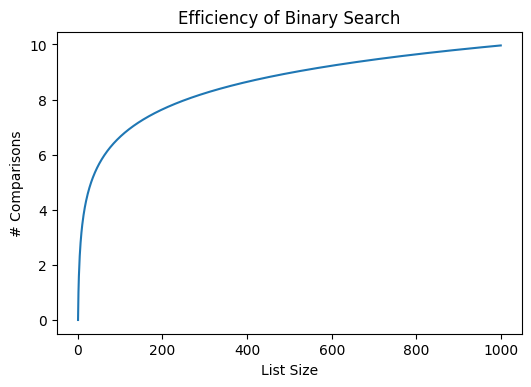

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.dpi = 100
ax.set_xlabel('List Size')
ax.set_ylabel('# Comparisons')
ax.set_title('Efficiency of Binary Search')
n = np.arange(1, 1000)
p = plt.plot(n, np.log2(n))

### Overview of Sorting

Sorting is the process of putting elements from a collection into some kind of order. Generally speaking, sorting data makes it easier to solve various kinds of problems (e.g., searching, finding the maximum element, computing certain statistics, among others).

### Bubble Sort

The [**bubble sort**](
) algorithm makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each completed pass through the list places the next largest value in its proper place. In essence, each item "bubbles" up to the location where it belongs.

In [0]:
from IPython.display import display, HTML
display(HTML('''<img src="https://www.cs.stonybrook.edu/~ktm/courses/cse101/colab_images/bubblesort.png" width="525">'''))

In [0]:
def bubble_sort(alist):
    for i in range(len(alist)-1, 0, -1):  # start counting from highest index
        for j in range(i):
            if alist[j] > alist[j+1]:     # elements are out of order
                alist[j], alist[j+1] = alist[j+1], alist[j]  # swaps two elements

nums = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(nums)
nums

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### Insertion Sort

The [**insertion sort**](https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheInsertionSort.html) algorithm also uses repeated passes through the list:

1. The initial item to work on is at index 1 (not 0).
1. Pick up the current item.
1. Scan the left-hand part backwards from that index until we find an item smaller than the current item or we arrive at the front of the list, whichever comes first.
1. Insert the current item back into the list at this location.
1. The next item to work on is to the right of the original location of the item.
1. Go back to step 2

Example #1

```
7 1 6 9 5 4   leave the 7 alone
1 7 6 9 5 4   inserted the 1
1 6 7 9 5 4   inserted the 6
1 6 7 9 5 4   inserted the 9 (doesn't move)
1 5 6 7 9 4   inserted the 5
1 4 5 6 7 9   inserted the 4
```

Example #2
```
8 6 7 5 3 0 9   leave the 8 alone
6 8 7 5 3 0 9   insert the 6
6 7 8 5 3 0 9   insert the 7
5 6 7 8 3 0 9   insert the 5
3 5 6 7 8 0 9   insert the 3
0 3 5 6 7 8 9   insert the 0
0 3 5 6 7 8 9   insert the 9 (doesn't move)
```

In [0]:
def insertion_sort(alist):
    for i in range(1, len(alist)):
        j = i
        x = alist.pop(j)                 # remove the item we need to insert
        while j > 0 and alist[j-1] > x:  # search for a value less than our item
            j -= 1
        alist.insert(j, x)               # insert our item into the right place

nums = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(nums)
nums

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### Selection Sort

The [**selection sort**](https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html) algorithm also uses repeated passes through the list:

1. Find the smallest value. Swap it (exchange it) with the first value in the list.
1. Find the second-smallest value. Swap it with the second value in the list.
1. Find the third-smallest value. Swap it with the third value in the list.
1. Keep finding the next-smallest value and swapping it into the correct position until the list is sorted.

Example #1
```
7 1 6 9 5 4
1 7 6 9 5 4   swapped 1 and 7
1 4 6 9 5 7   swapped 4 and 7
1 4 5 9 6 7   swapped 5 and 6
1 4 5 6 9 7   swapped 6 and 9
1 4 5 6 7 9   swapped 7 and 9
```
Example #2
```
8 4 6 7 5 3 2 9 1 	
1 4 6 7 5 3 2 9 8   swapped 1 and 8
1 2 6 7 5 3 4 9 8   swapped 2 and 4
1 2 3 7 5 6 4 9 8   swapped 3 and 6
1 2 3 4 5 6 7 9 8   swapped 4 and 7
1 2 3 4 5 6 7 9 8   swapped 5 and 5 (silly!)
1 2 3 4 5 6 7 9 8   swapped 6 and 6 (silly!)
1 2 3 4 5 6 7 9 8   swapped 7 and 7 (silly!)
1 2 3 4 5 6 7 8 9   swapped 8 and 9
```

In [0]:
def selection_sort(alist):
    for i in range(len(alist)-1):
        min_i = i
        for j in range(i+1, len(alist)):
            if alist[j] < alist[min_i]:
                min_i = j
        alist[min_i], alist[i] = alist[i], alist[min_i]

nums = [54, 26, 93, 17, 77, 31, 44, 55, 20]
selection_sort(nums)
nums

[17, 20, 26, 31, 44, 54, 55, 77, 93]

The variant of the selection sort algorithm from the [linked web page](https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSelectionSort.html) repeatedly finds the largest element instead of the smallest element. The visualization below shows the general idea.

In [0]:
from IPython.display import display, HTML
display(HTML('''<img src="https://www.cs.stonybrook.edu/~ktm/courses/cse101/colab_images/selectionsort.png" width="500">'''))

### Algorithmic Efficiency of Sorting

All three of these sorting algorithms are pretty inefficient. For each algorithm, as the length of the list grows, the number of swaps, insertions and other basic operations grows at a rate proportional to $n^2$ (quadratic growth).

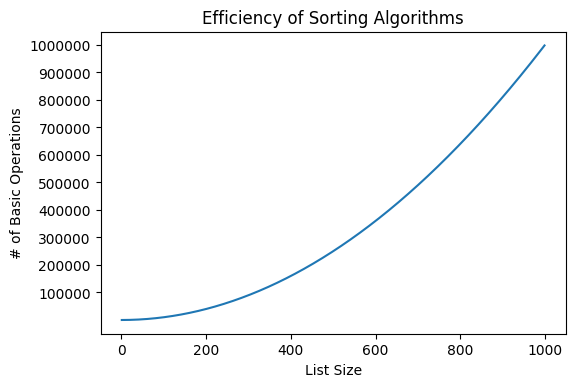

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.dpi = 100
ax.set_xlabel('List Size')
ax.set_ylabel('# of Basic Operations')
ax.set_title('Efficiency of Sorting Algorithms')
ax.ticklabel_format(useOffset=False, style='plain')
n = np.arange(1, 1000)
plt.yticks(np.arange(100000,1100000,100000))
p = plt.plot(n, n*n)